In [33]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
import load_data

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load data

In [21]:
df = load_data.load_county_level()
outcome_cases = 'tot_cases'
outcome_deaths = 'tot_deaths'
df, df_test = load_data.split_data(df)

loading county level data...


/accounts/projects/vision/chandan/covid-19-geographic-risk-prediction/functions/merge_data.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  diabetes = pd.read_csv(diabetes, skiprows = 2, skipfooter = 1)


**restrict analysis**

In [26]:
df = df[df[outcome_cases] > 10]

In [53]:
# parameters to fit
class p:
    seed = 42
    outcome = outcome_deaths
    feat_names = ['PopulationDensityperSqMile2010']
    model_type = 'linear'
# parameters to save
class s:
    pass

In [55]:
# fit
np.random.seed(p.seed)
X = df[p.feat_names]
y = df[p.outcome]
X_test = df_test[p.feat_names]
y_test = df_test[p.outcome]

if p.model_type == 'linear':
    m = LinearRegression()
m.fit(X, y)
s.m = m
s.y_pred_train = m.predict(X)
s.y_pred_test = m.predict(X_test)

# look at predictions

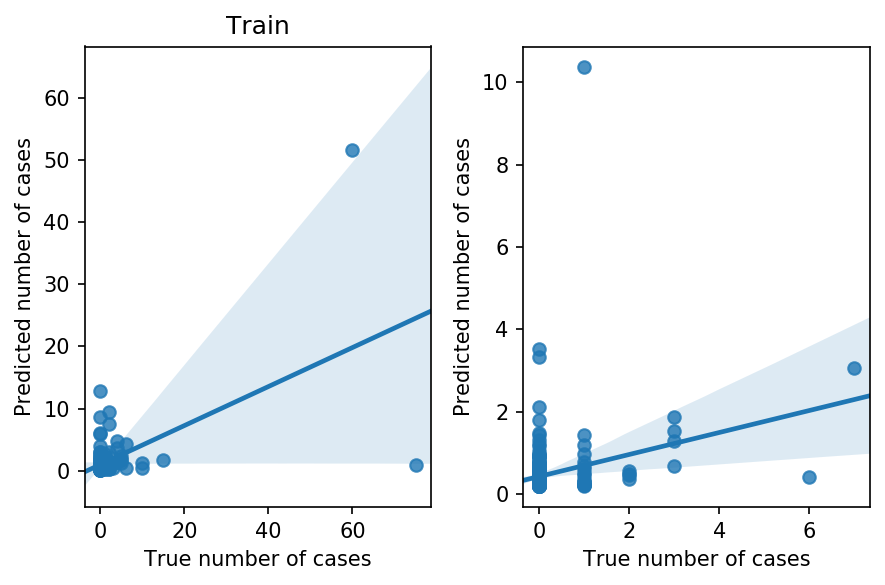

In [60]:
R, C = 1, 2

plt.figure(dpi=150)
plt.subplot(R, C, 1)
plt.title('Train')
sns.regplot(y, s.y_pred_train)
# plt.plot(y, y_pred_train, '.', alpha=0.5)
plt.xlabel('True number of cases')
plt.ylabel('Predicted number of cases')

plt.subplot(R, C, 2)
sns.regplot(y_test, s.y_pred_test)
# plt.plot(y, y_pred_train, '.', alpha=0.5)
plt.xlabel('True number of cases')
plt.ylabel('Predicted number of cases')
plt.tight_layout()
plt.show()